In [1]:
import os
import cv2
import numpy as np
from cvl.dataset import OnlineTrackingBenchmark
from cvl.trackers import MOSSETracker, DCFMOSSETracker
from cvl.lib import get_roi, resume_performance, get_arguments
import matplotlib.pyplot as plt
from copy import copy, deepcopy
import torch
from tqdm.notebook import tqdm as tqdm
import json

In [2]:
def get_map(list_ious, threshold = 0.5):
    return np.sum((np.array(list_ious)>threshold)) / len(list_ious)

In [6]:
rf_mobilenet = f"../results/map/best_mobilenet.json"
rf_vgg = f"../results/map/bestvgg16.json"
rf_alexnet = f"../results/map/best_alexnet_5_layer.json"
rf_mosse = f"../results/map/best_mosse.json"
# handcrafted
trackers = ["mob", "vgg", "alex", "mosse"]

In [7]:
results = {}

In [8]:
paths = [rf_mobilenet, rf_vgg, rf_alexnet, rf_mosse]
for idx, p in enumerate(paths):
    with open(p, 'r') as fp:
        data = json.load(fp)
        results[trackers[idx]] = list(data.values())

In [9]:
results_ious = {}


In [10]:
for t in trackers:
    ious = []
    for seq in results[t]:
        ious.extend(seq)
    results_ious[t] = ious

In [11]:
get_map(results_ious["mosse"], threshold=0.5)

0.31008842443729906

In [22]:
number_points = 10001

In [23]:
thresholds = np.linspace(0,1,number_points)

In [24]:
curves_plt = {}

In [25]:
for tracker in trackers:
    y_values = []
    for t in thresholds:
        y_values.append(get_map(results_ious[tracker],t))
    curves_plt[tracker] = y_values

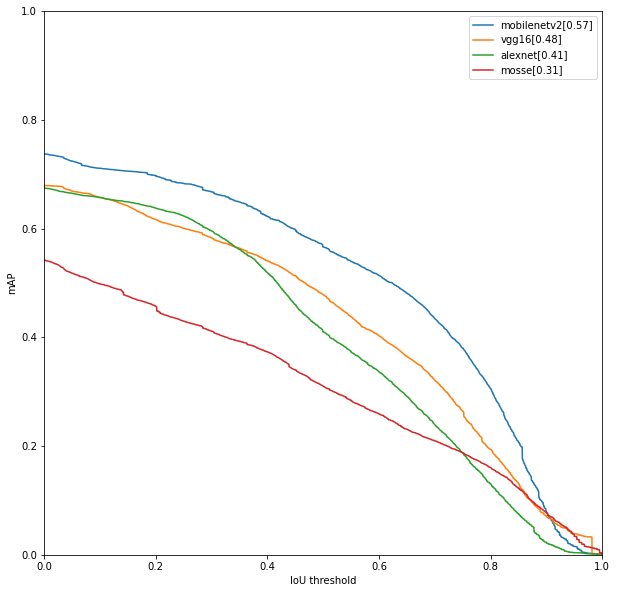

In [26]:
plt.figure(figsize=(10,10))
for tracker in trackers:
    plt.plot(thresholds, curves_plt[tracker]);
plt.legend([f"mobilenetv2[{round(get_map(results_ious['mob'], threshold=0.5),2)}]", 
            f"vgg16[{round(get_map(results_ious['vgg'], threshold=0.5),2)}]", 
            f"alexnet[{round(get_map(results_ious['alex'], threshold=0.5),2)}]", 
            f"mosse[{round(get_map(results_ious['mosse'], threshold=0.5),2)}]"]);
plt.xlim([0,1]);
plt.ylim([0,1]);
plt.xlabel("IoU threshold");
plt.ylabel("mAP");